# Polynomial regression

In this notebook, which takes inspiration from Section 1.1 of *Pattern Recognition and Machine Learning* (Bishop, 2006), we explore Polynomial Regression as a way to explain some basic concepts of Machine Learning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
    "font.size": 14,
    "figure.dpi": 300})

## LinearRegression class to solve this problem

In [3]:
class LinearRegression:
    """
    A class to make linear regression.

    Attributes:
        reg_term (float): L2-regulariser.
    """
    def __init__(self, reg_term):
        self.reg_term = reg_term
        
    def rmse(self, y, t):
        """
        Computes the root mean squared error (RMSE).

        Args:
            N: total number of training data points.
            y: N x 1 vector containing the predictions for each data point.
            t: N x 1 target vector.

        Returns:
            Root mean squared error (float).
        """
        N = y.shape[0]
        E = (0.5 * np.dot((y - t).T, y - t)).item()
        
        return np.sqrt(2 * E / N)
    
    def fit(self, data, targets):
        """
        Applies the analytical solution of Linear regression to fit its weights to the data.

        Args:
            data: N x M matrix, with N being the total number of training points and M the total number of independent variables (or features).
            targets: N x 1 target vector.

        Returns:
            Loss (float): RMSE after the fit.
            weights (float): The weights of linear regression.
        """
        N = data.shape[0]
        weights = np.matmul(np.matmul(np.linalg.inv(self.reg_term*np.eye(data.shape[1]) + np.matmul(data.T, data)), data.T), targets)
        y = np.matmul(data, weights)
        Loss = self.rmse(y, targets)
        
        return Loss, weights
    
    def test_loss(self, data_test, targets_test, weights):
        """
        Applies linear regression with the fitted weights to test data and computes the loss.

        Args:
            data_test: N' x M matrix, with N' being the total number of test points and M the total number of independent variables (or features).
            targets_test: N' x 1 target vector for test data.
            weights: M x 1 vector with the linear regression weights.

        Returns:
            Loss (float): RMSE in test data.
        """
        N = data_test.shape[0]
        y = np.matmul(data_test, weights)
        Loss = self.rmse(y, targets_test)
        return Loss

## The data

In [4]:
# Number of data points for training and testing
train_size = 10
test_size = 100

In [5]:
data_train = np.linspace(0, 1, train_size, endpoint=True)
## Uncomment to generate new random observations of training data
#y_train = (np.sin(2 * np.pi * data_train) + np.random.normal(scale=0.25, size=train_size).reshape(1, -1)).T
#np.savetxt('InputData/PolReg-y_train.txt', y_train)

data_test = np.linspace(0, 1, test_size, endpoint=True)
## Uncomment to generate new random observations of test data
#y_test = (np.sin(2 * np.pi * data_test) + np.random.normal(scale=0.25, size=test_size).reshape(1, -1)).T
#np.savetxt('InputData/PolReg-y_test.txt', y_test)

y_train = np.loadtxt('InputData/PolReg-y_train.txt')
y_test = np.loadtxt('InputData/PolReg-y_test.txt')

X_func = np.linspace(0, 1, 101, endpoint=True)
y_func = np.sin(2 * np.pi * X_func)

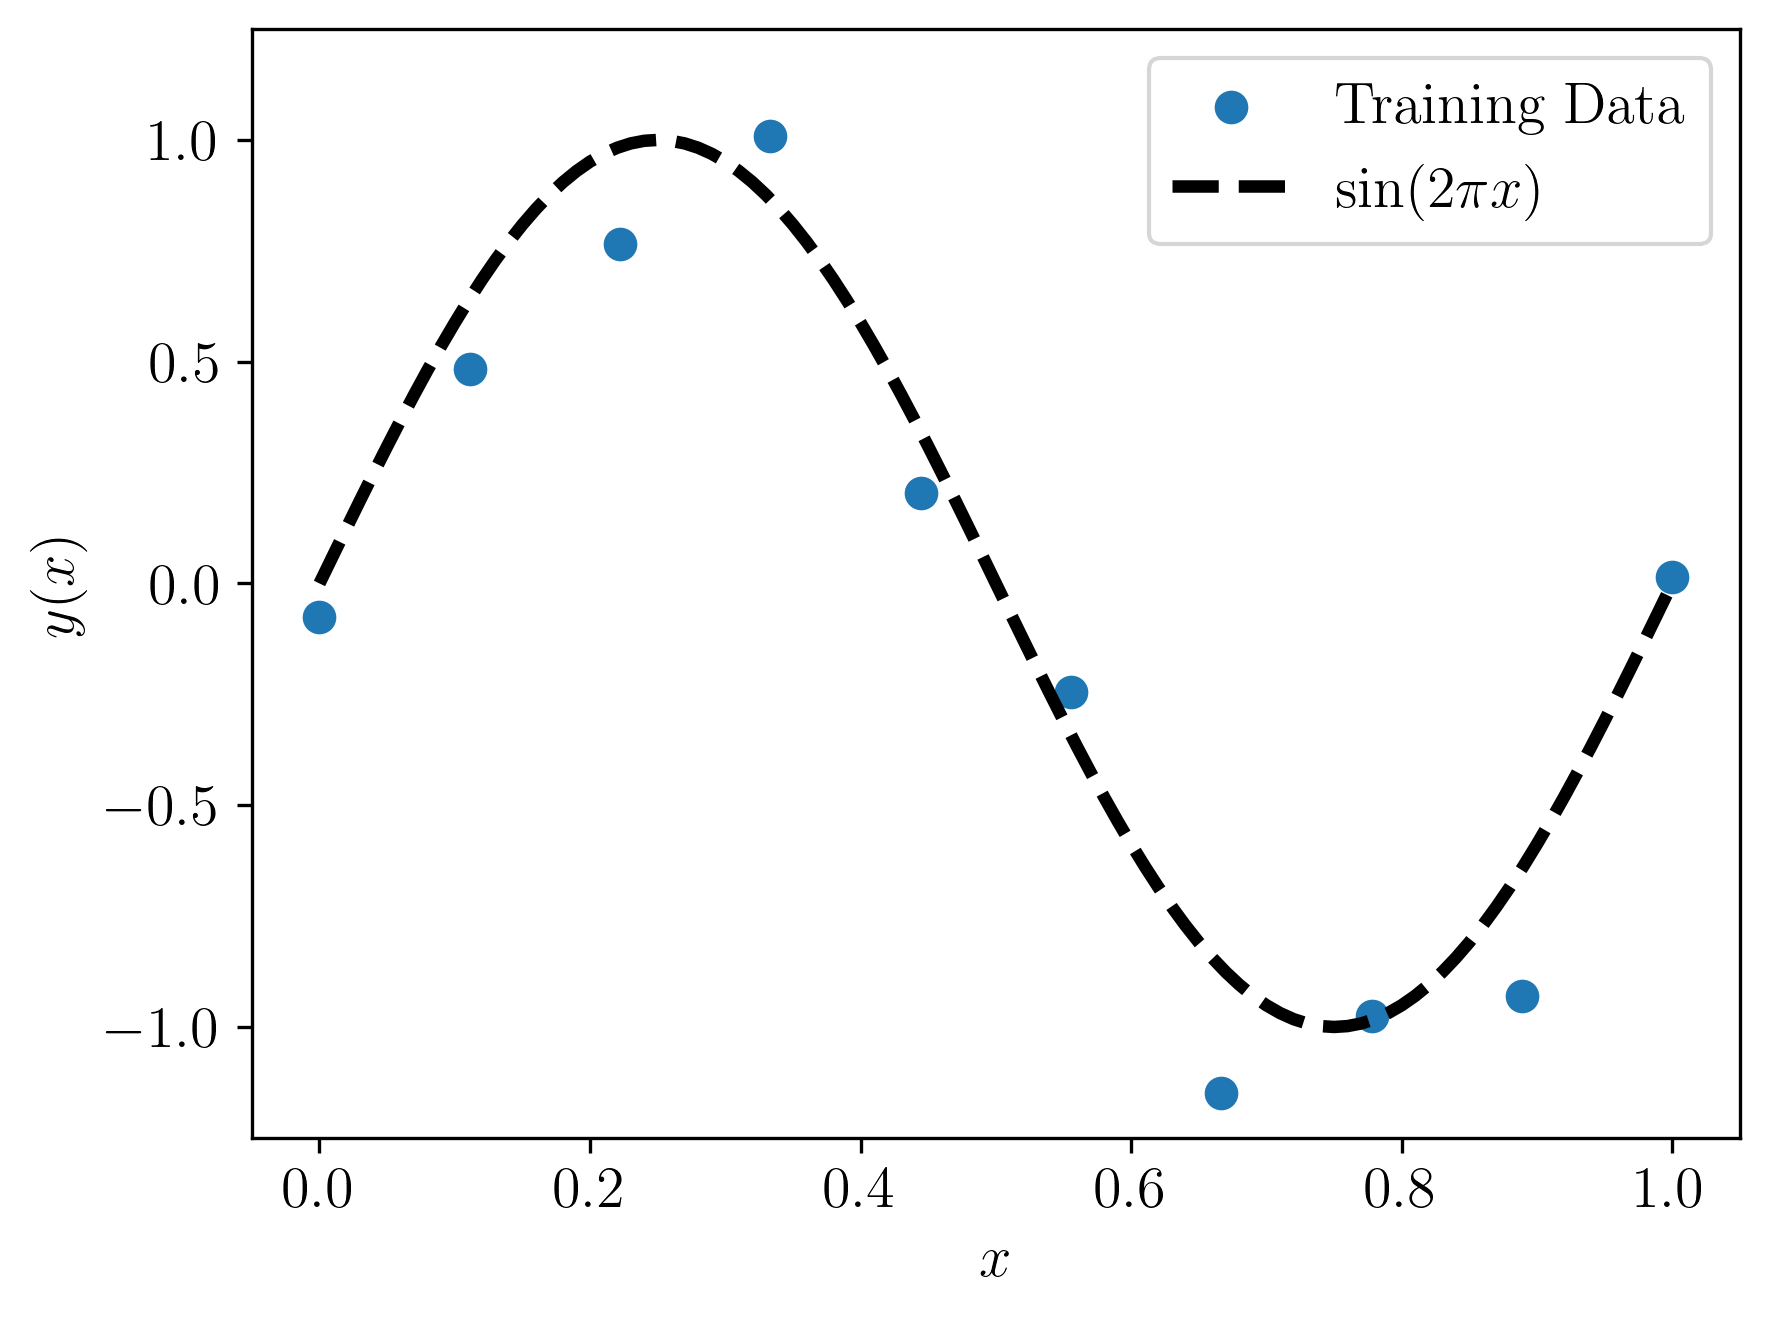

In [6]:
plt.scatter(x=data_train, y=y_train, s=50, marker="o")
plt.plot(X_func, y_func, linewidth=3, linestyle='dashed', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.ylim((-1.25, 1.25))
plt.legend(['Training Data', r'$\sin(2\pi x)$'])
plt.savefig('Plots/PolReg-StartingPlot.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

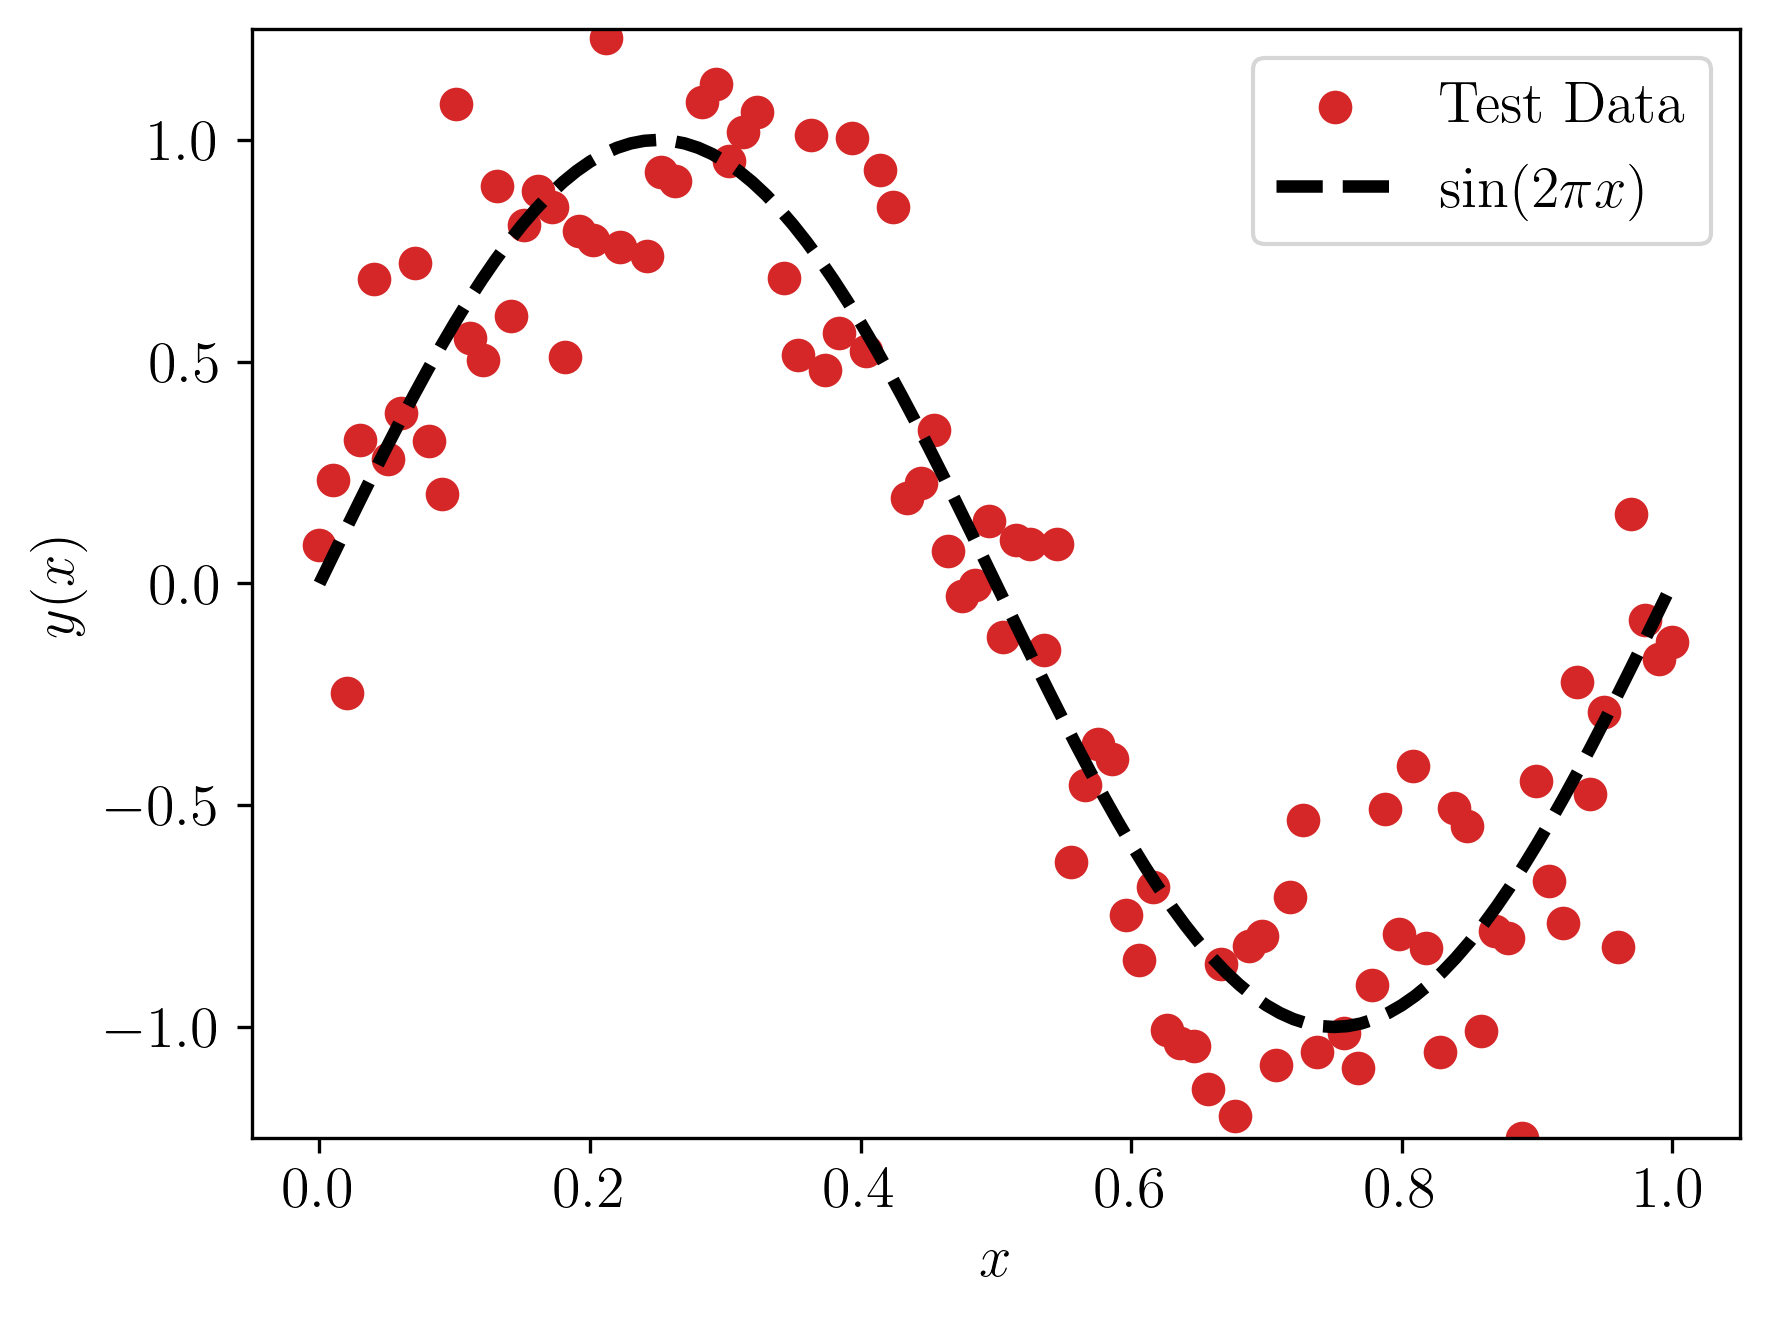

In [7]:
plt.scatter(x=data_test, y=y_test, s=50, marker="o", color='C3')
plt.plot(X_func, y_func, linewidth=3, linestyle='dashed', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.ylim((-1.25, 1.25))
plt.legend(['Test Data', r'$\sin(2\pi x)$'])
#plt.savefig('Plots/PolReg-TestPlot.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

## Loss as a function of the degree of the polynomial

In [8]:
Loss_train = []
Loss_test = []

In [9]:
# At each iteration we increase the degree of the polynomial we are fitting to data.
for degree in range(1, 10):
    X_train = np.ones((train_size,1)).reshape(-1, 1)
    X_test = np.ones((test_size,1)).reshape(-1, 1)
    X_plot = np.ones((X_func.shape[0], 1))
    for n in range(1, degree + 1):
        X_train = np.column_stack((X_train, data_train ** n))
        X_test = np.column_stack((X_test, data_test ** n))
        X_plot = np.column_stack((X_plot, X_func ** n))
    model = LinearRegression(0)
    L_train, w = model.fit(X_train, y_train)
    L_test = model.test_loss(X_test, y_test, w)
    Loss_train.append(L_train)
    Loss_test.append(L_test)
    np.savetxt('OutputData/PolReg-weights_' + str(n) + '.txt', w) # For each polynomial order, there is a file containing the linear regression weights. 
    pred_func = np.matmul(X_plot, w).tolist()
    # Plots are generated but we do not show here to save space.
    plt.scatter(x=data_train, y=y_train, s=50, marker="o")
    plt.plot(X_func, y_func, linewidth=3, linestyle='dashed', color='black')
    plt.plot(X_func, pred_func, linewidth=3, color='orange')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y(x)$')
    plt.legend(['Training data', r'$\sin(2\pi x)$', r'$f(x,\mathbf{w}^\star) (M=$' + str(degree) + r'$)$'])
    plt.ylim((-1.25, 1.25))
    plt.savefig('Plots/PolReg-FitDegree_' + str(n) + '.png', bbox_inches='tight', pad_inches=0.01)
    plt.clf()

<Figure size 1920x1440 with 0 Axes>

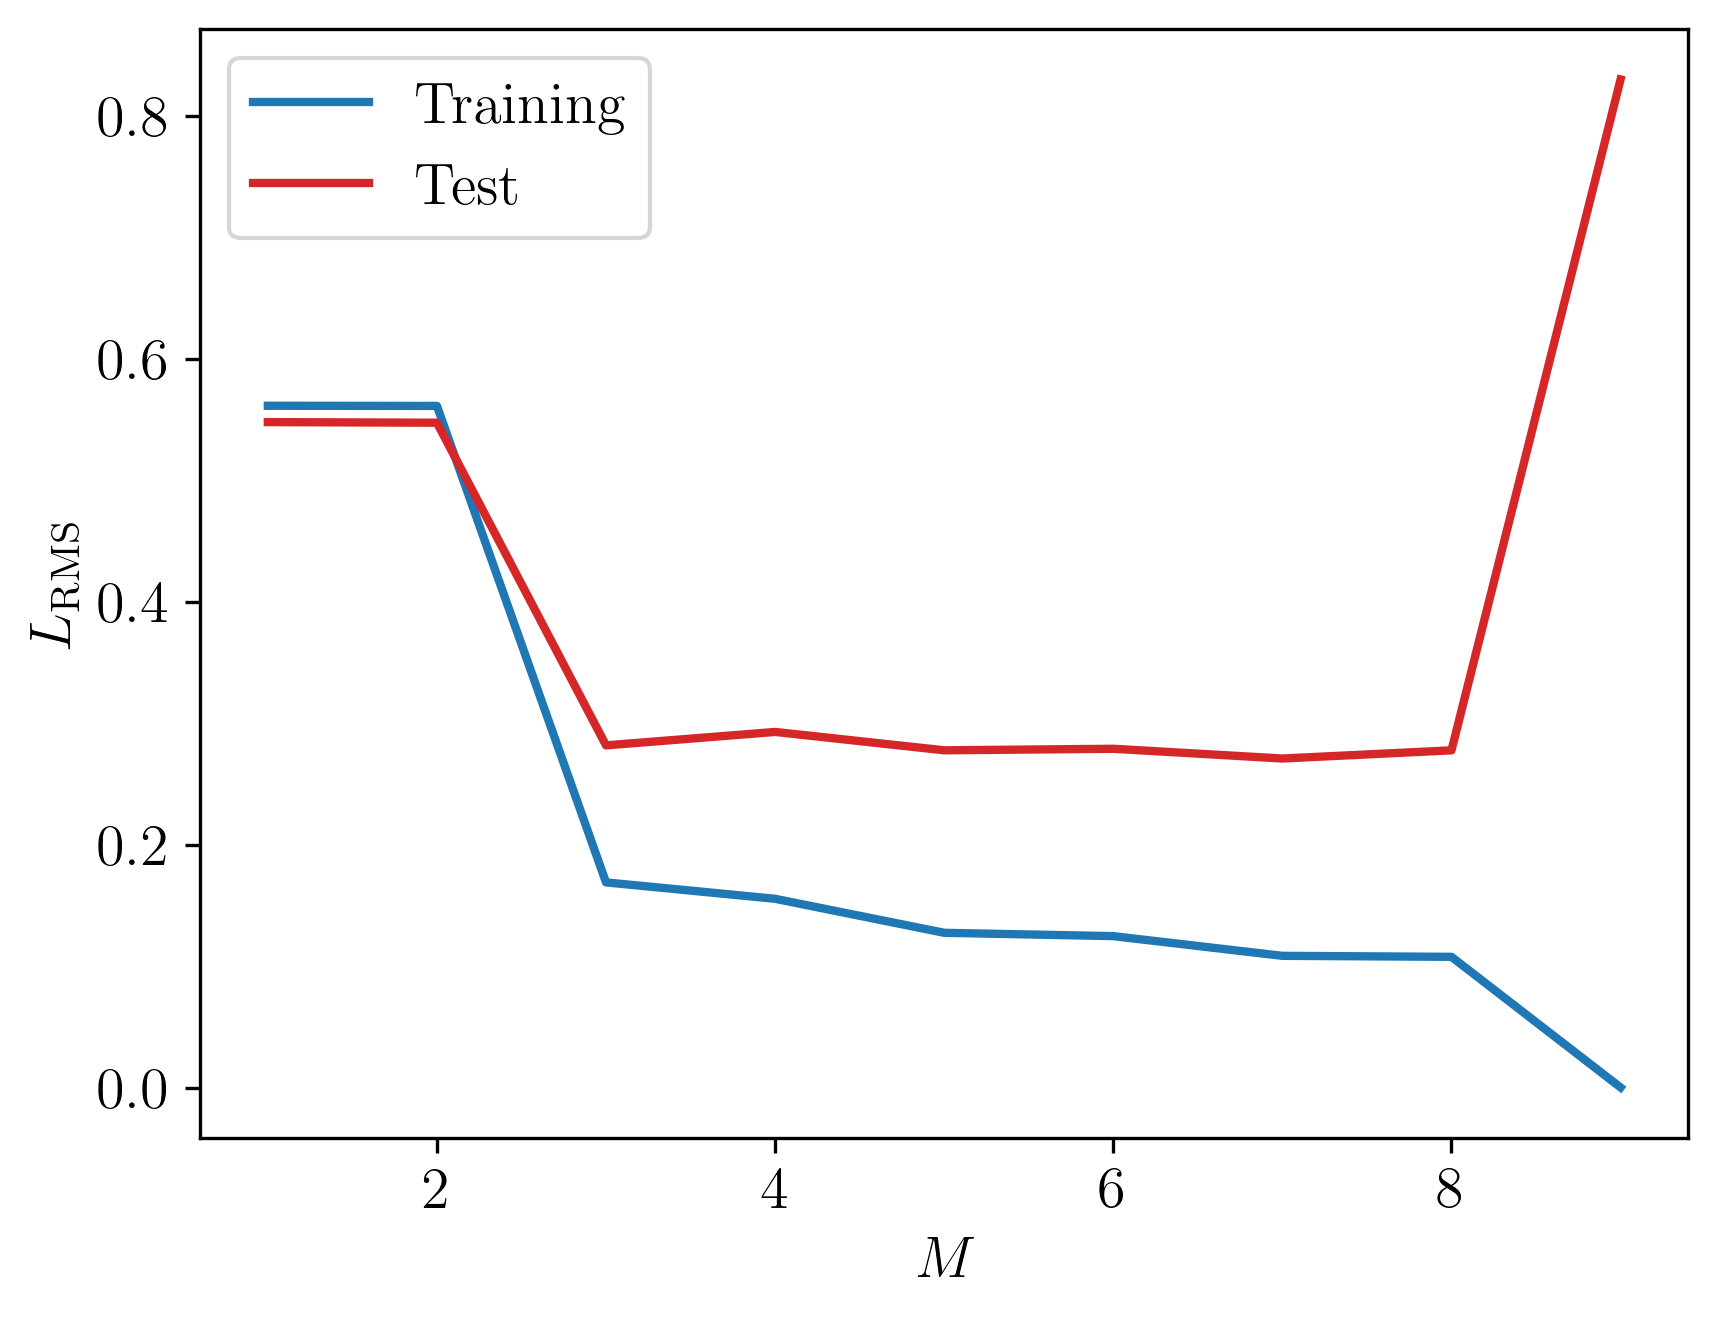

In [10]:
Loss_func = np.arange(1, 10)
plt.plot(Loss_func, Loss_train, linewidth=2)
plt.plot(Loss_func, Loss_test, linewidth=2, color="C3")
plt.xlabel(r'$M$')
plt.ylabel(r'$L_{\rm RMS}$')
plt.legend(['Training', 'Test'])
plt.savefig('Plots/PolReg-Loss.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

## Strategies to avoid overfitting

### Regularisation

In [11]:
RegLoss_train = []
RegLoss_test = []
Lambda = []
min_RegLoss = 1
min_loglambda = 0

In [12]:
# Here we find the value of the regulariser that minimises the loss
for log_l in range(-36, 1):
    l = np.exp(log_l)
    model = LinearRegression(l)
    L_train, w = model.fit(X_train, y_train)
    L_test = model.test_loss(X_test, y_test, w)
    if min_RegLoss > L_test:
        min_RegLoss = L_test
        min_loglambda = log_l
    RegLoss_train.append(L_train)
    RegLoss_test.append(L_test)
    Lambda.append(log_l)

print("Best regulariser value: " + str(min_loglambda))

Best regulariser value: -14


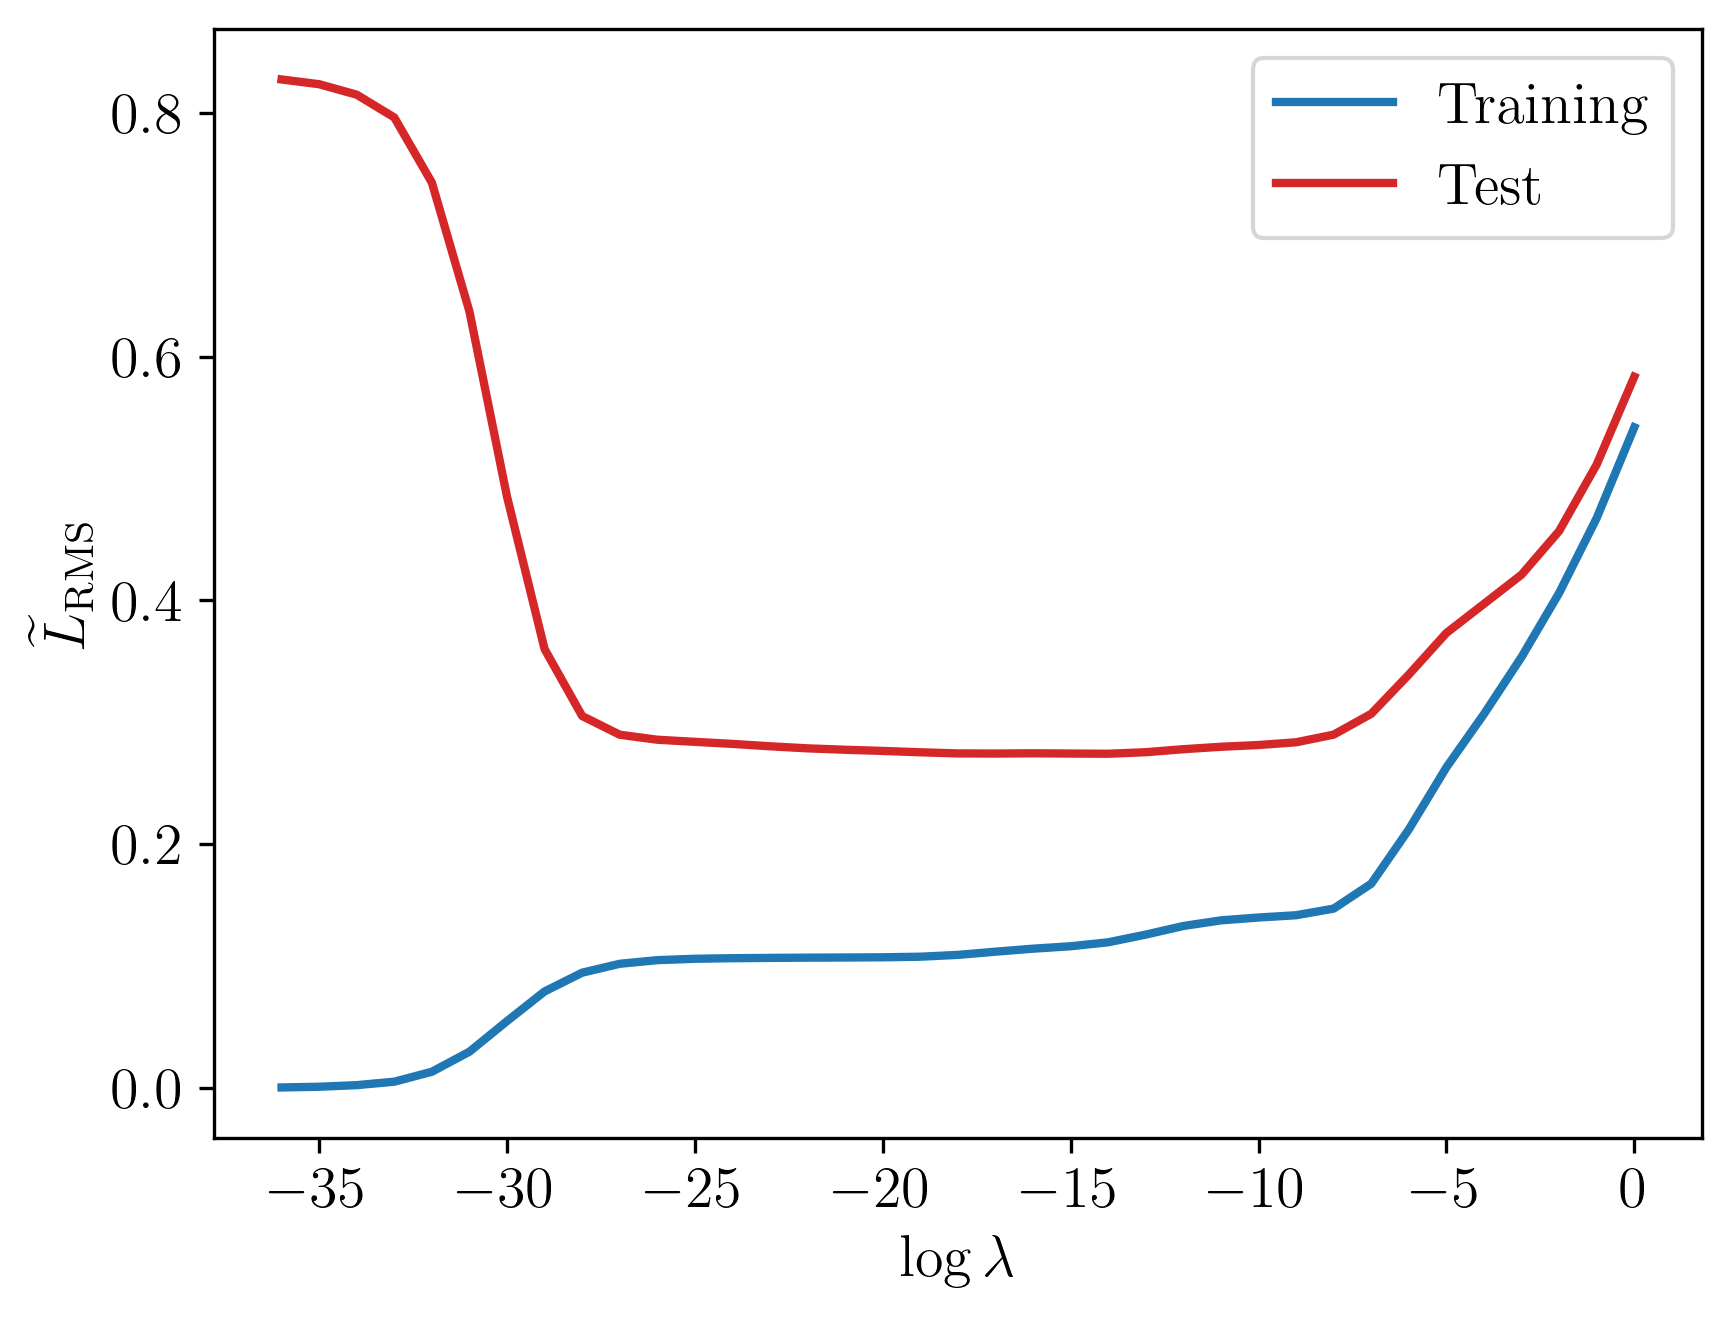

In [13]:
plt.plot(Lambda, RegLoss_train, linewidth=2)
plt.plot(Lambda, RegLoss_test, linewidth=2, color="C3")
plt.xlabel(r'$\log \lambda$')
plt.ylabel(r'$\widetilde{L}_{\rm RMS}$')
plt.legend(['Training', 'Test'])
plt.savefig('Plots/PolReg-RegulLoss.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

In [14]:
model_bestReg = LinearRegression(np.exp(min_loglambda))
_, w_best = model_bestReg.fit(X_train, y_train)
pred_best = np.matmul(X_plot, w_best).tolist()
np.savetxt('OutputData/PolReg-weights_BestRegul.txt', w_best)

model_superReg = LinearRegression(1)
_, w_under = model_superReg.fit(X_train, y_train)
pred_under = np.matmul(X_plot, w_under).tolist()
np.savetxt('OutputData/PolReg-weights_TooRegul.txt', w_under)

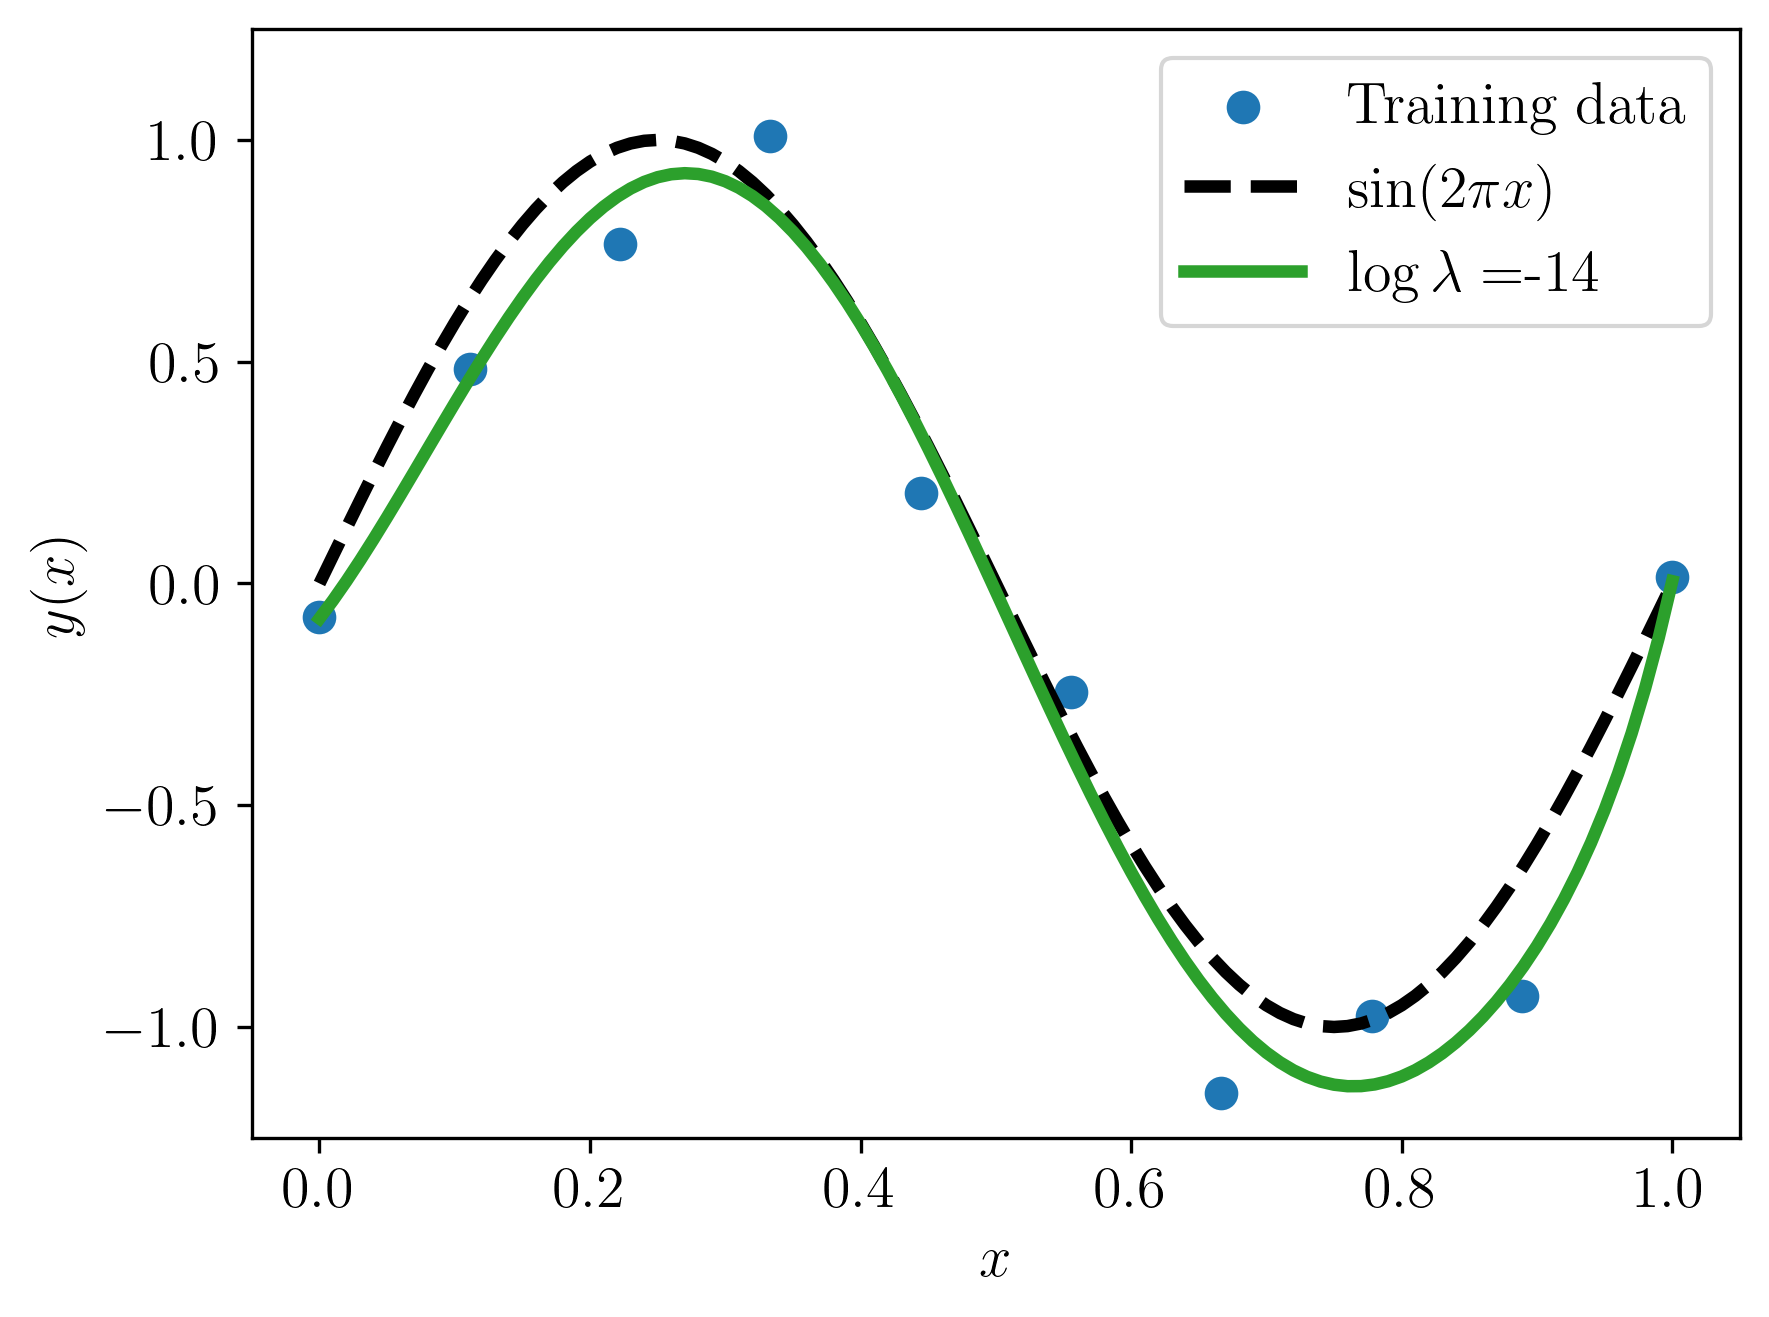

In [15]:
plt.scatter(x=data_train, y=y_train, s=50, marker="o")
plt.plot(X_func, y_func, linewidth=3, linestyle='dashed', color='black')
plt.plot(X_func, pred_best, linewidth=3, color='C2')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.ylim((-1.25, 1.25))
plt.legend([r"Training data", r'$\sin(2\pi x)$', r"$\log\lambda=$" + str(min_loglambda)])
plt.savefig('Plots/PolReg-Fit_BestRegul.png', bbox_inches='tight', pad_inches=0.01)

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_112877/3843405816.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.legend([r"Training data", r'$\sin(2\pi x)$', "$\log\lambda=0$"])


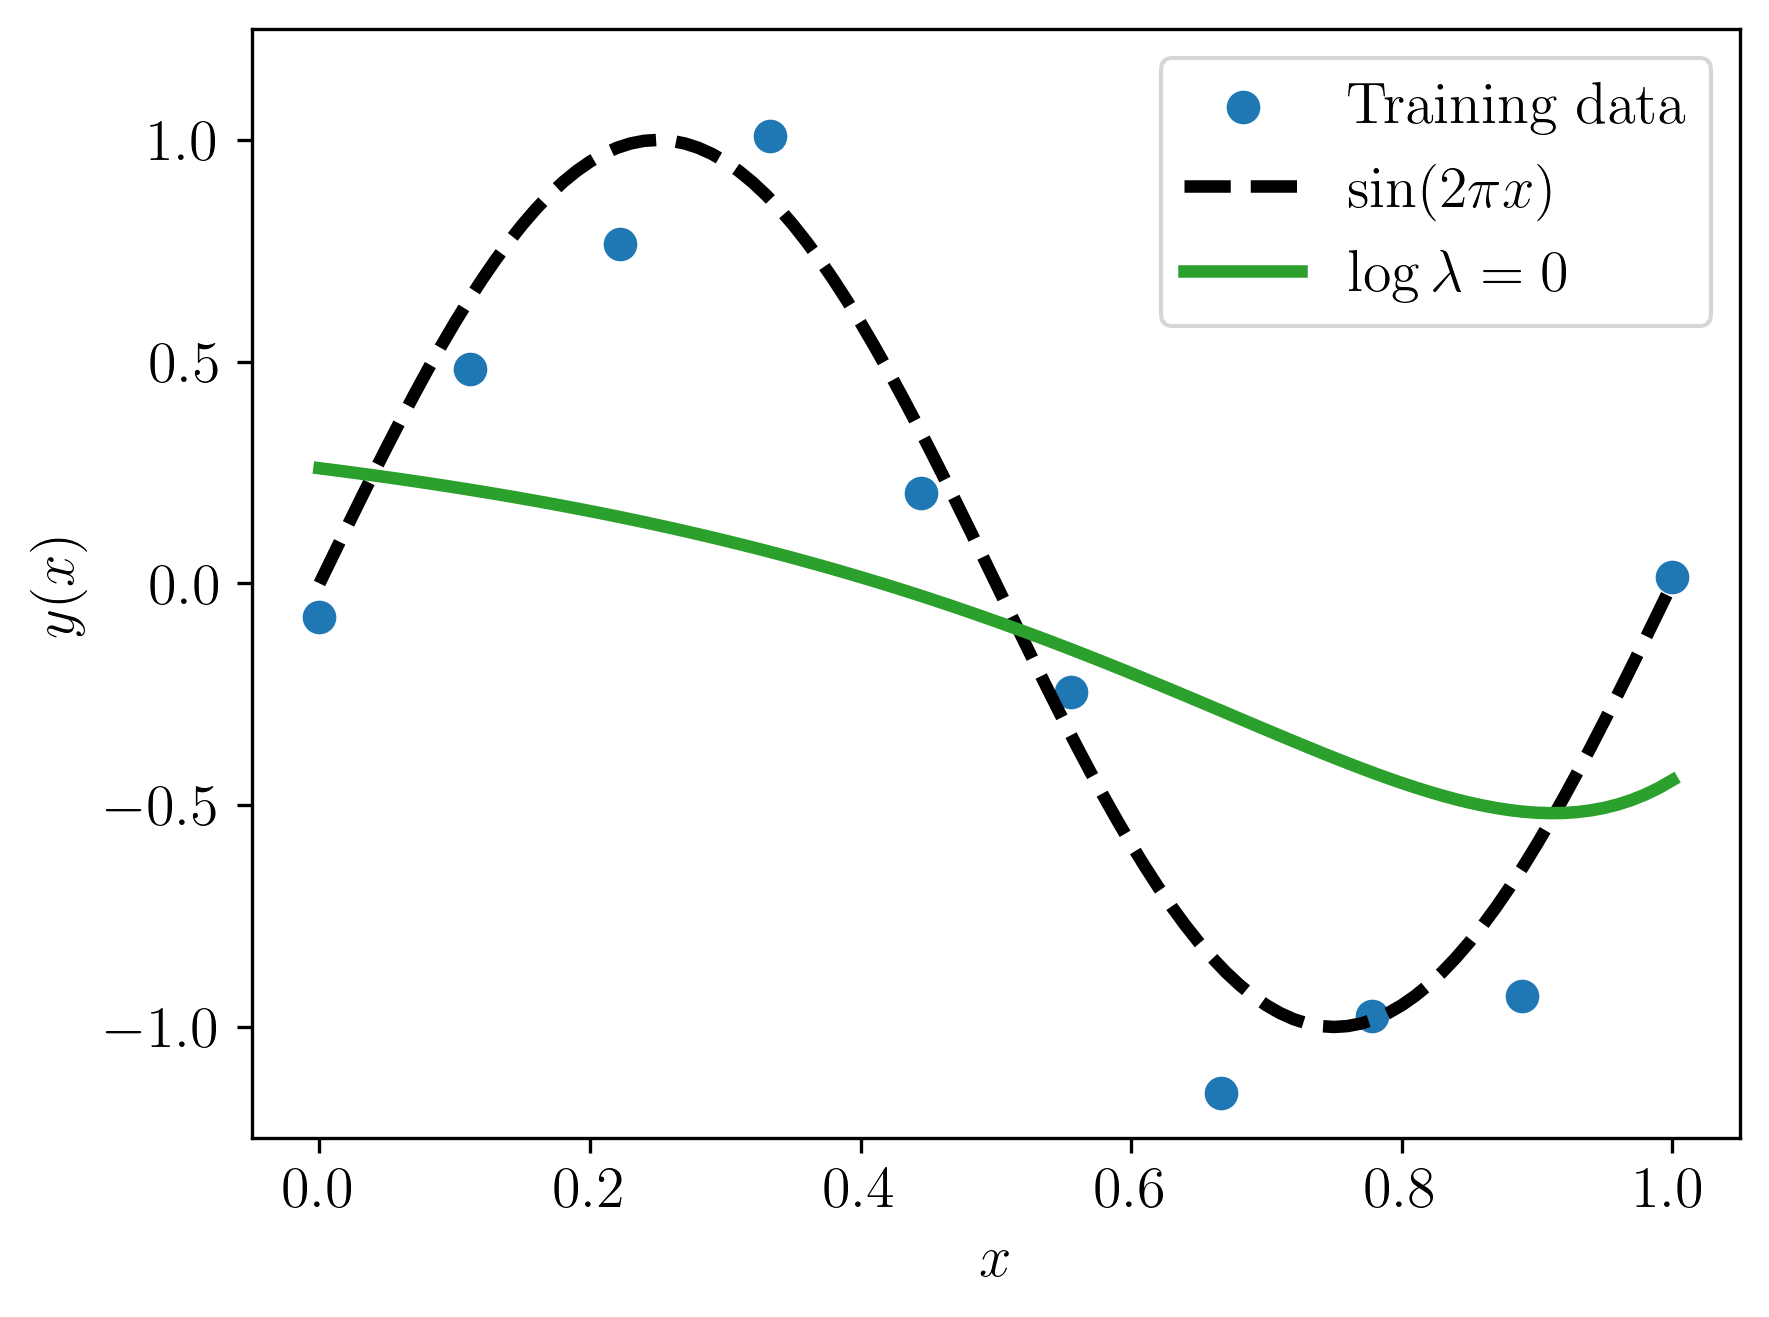

In [16]:
plt.scatter(x=data_train, y=y_train, s=50, marker="o")
plt.plot(X_func, y_func, linewidth=3, linestyle='dashed', color='black')
plt.plot(X_func, pred_under, linewidth=3, color='C2')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.ylim((-1.25, 1.25))
plt.legend([r"Training data", r'$\sin(2\pi x)$', "$\log\lambda=0$"])
plt.savefig('Plots/PolReg-Fit_TooRegul.png', bbox_inches='tight', pad_inches=0.01)

### More data

In [17]:
new_train_size = 200

In [18]:
new_data_train = np.linspace(0, 1, new_train_size, endpoint=True)
## Uncomment to generate new random observations of test data.
#new_y_train = (np.sin(2 * np.pi * new_data_train) + np.random.normal(scale=0.25, size=new_train_size).reshape(1, -1)).T
#np.savetxt('InputData/PolReg-y_MoreData.txt', new_y_train)

new_y_train = np.loadtxt('InputData/PolReg-y_MoreData.txt')

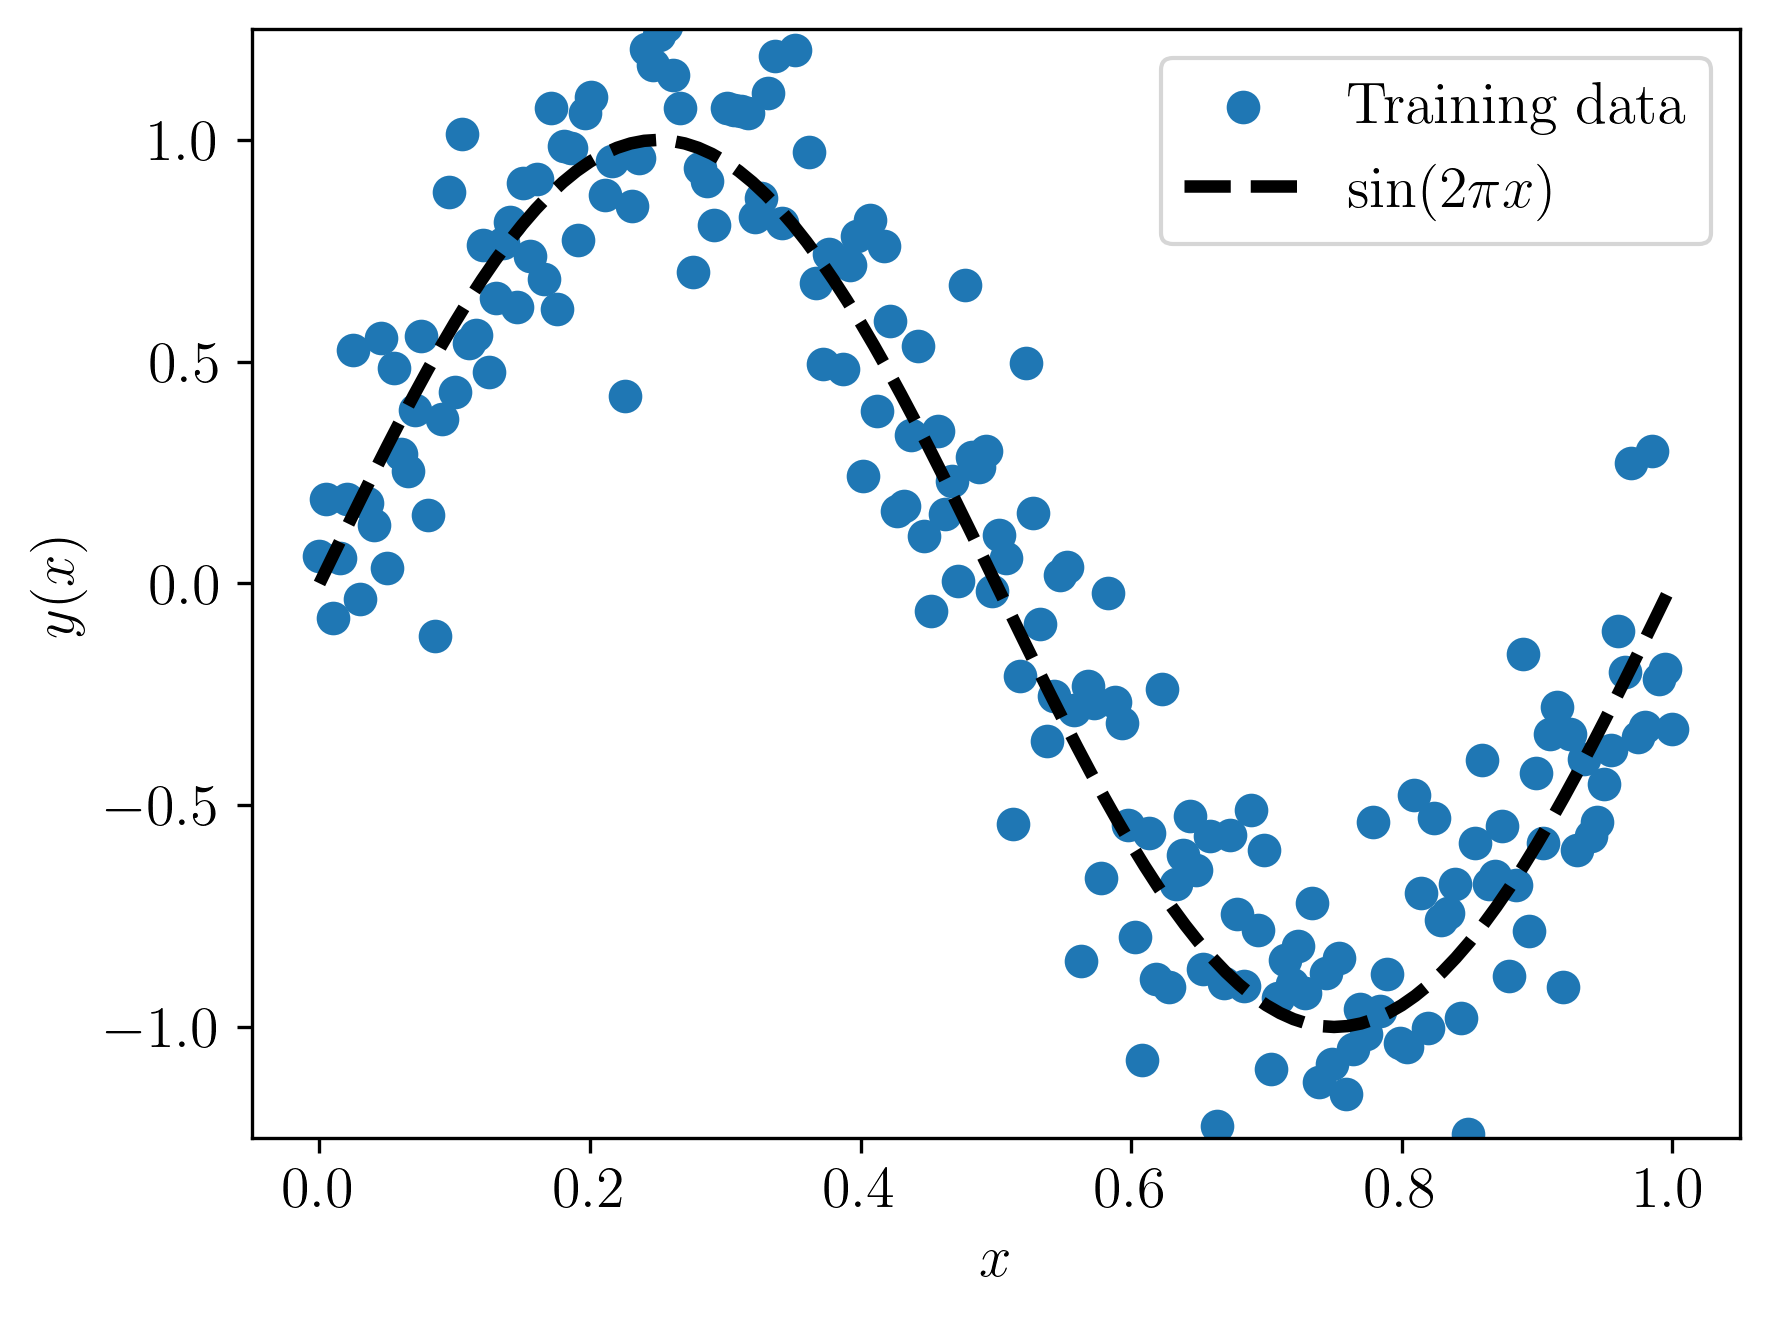

In [19]:
plt.scatter(x=new_data_train, y=new_y_train, s=50, marker="o")
plt.plot(X_func, y_func, linewidth=3, linestyle='dashed', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.ylim((-1.25, 1.25))
plt.rcParams['figure.dpi'] = 300
plt.legend([r"Training data", r'$\sin(2\pi x)$'])
plt.savefig('Plots/PolReg-MoreData.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

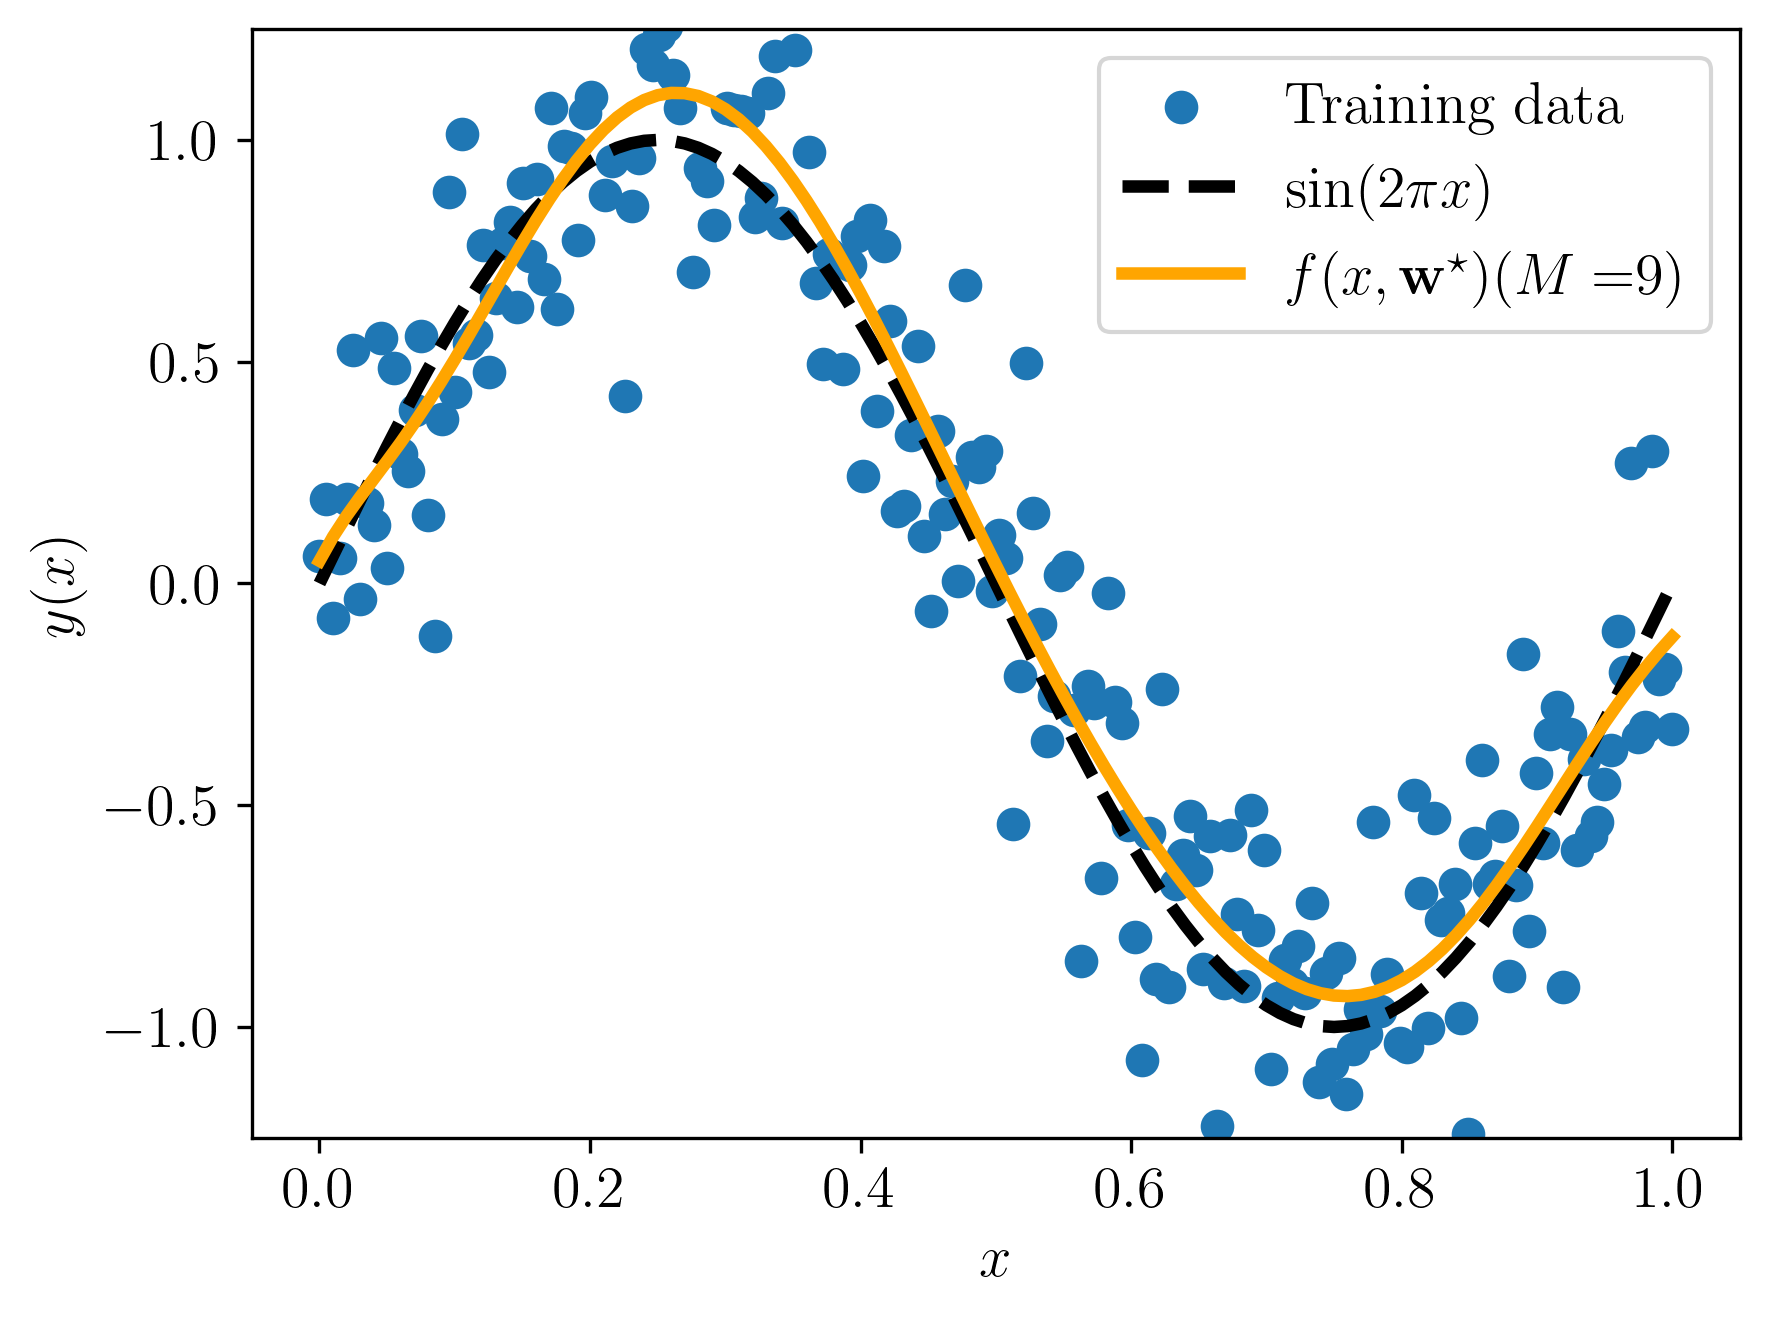

In [20]:
new_X_train = np.ones((new_train_size,1)).reshape(-1, 1)
for n in range(1, degree + 1):
    new_X_train = np.column_stack((new_X_train, new_data_train ** n))
model = LinearRegression(0)
L_train, w = model.fit(new_X_train, new_y_train)
pred_func = np.matmul(X_plot, w).tolist()
plt.scatter(x=new_data_train, y=new_y_train, s=50, marker="o")
plt.plot(X_func, y_func, linewidth=3, linestyle='dashed', color='black')
plt.plot(X_func, pred_func, linewidth=3, color='orange')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.ylim((-1.25, 1.25))
plt.legend([r"Training data", r'$\sin(2\pi x)$', r'$f(x,\mathbf{w}^\star) (M=$' + str(degree) + r'$)$'])
plt.savefig('Plots/PolReg-Fit_MoreData.png', bbox_inches='tight', pad_inches=0.01)
plt.show()